In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

## Reflect Tables into SQLAlchemy ORM

In [4]:
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# creating engine to hawaii.sqlite
engine = create_engine('sqlite:///Resources/hawaii.sqlite')

In [6]:
# reflecting an existing database into a new model
Base = automap_base()
# reflecting the tables
Base.prepare(engine, reflect=True)

In [7]:
# all the classes found by automap
Base.classes.keys()

['measurement', 'station']

In [8]:
# saving a reference to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# creating a session from python to the database
session = Session(engine)

## Exploratory Precipitation Analysis

In [10]:
# finding the most recent date in the dataset
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# calculate the date one year from the last date in the data set
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
# perform a query to retrieve the data and precipitation scores
precipitation_scores = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year).all()
# save the query results as a pandas dataframe and set the index to the date column
df = pd.DataFrame(precipitation_scores, columns=['date', 'precipitation'])
df.dropna()
df.set_index('date', inplace=True)
# sort the dataframe by date
df.sort_values(['date'], ascending=True, inplace=True)

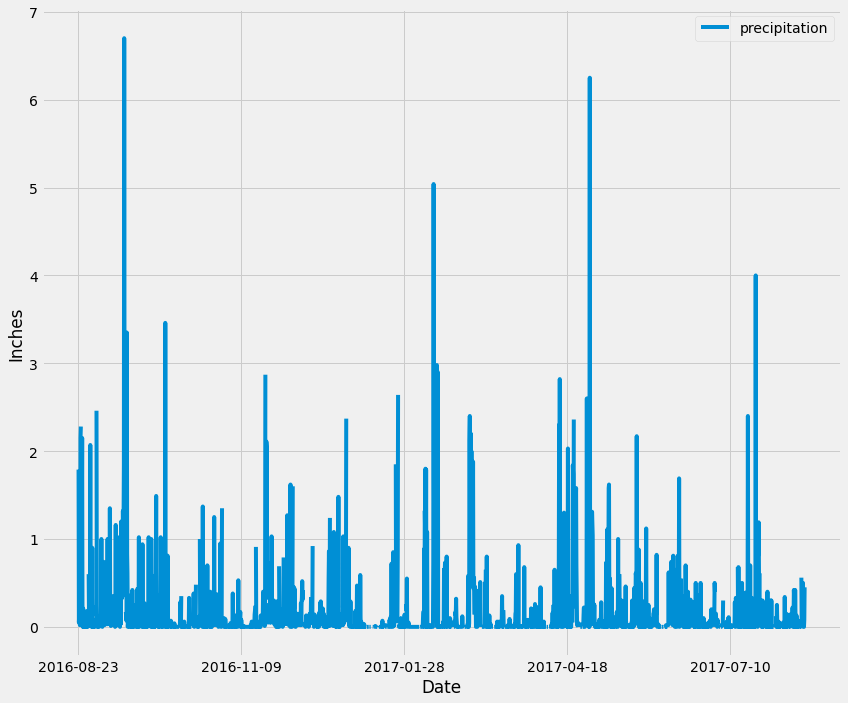

In [70]:
# use pandas plotting with matplotlib to plot the data
ticks = ['2016-08-23', '2016-10-01', '2016-11-09', '2016-12-19', '2017-01-28', '2017-03-09', '2017-05-31', '2017-07-10']

ax = df.plot(xlabel='Date', ylabel='Inches', figsize=(12,10))
ax.xaxis.set_tick_params(which='minor')
plt.tight_layout()

In [63]:
ax.get_xticks()

array([-500.,    0.,  500., 1000., 1500., 2000., 2500.])

In [32]:
# use pandas to calculate the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Exploratory Station Analysis

In [13]:
# design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.id)).all()

[(9,)]

In [18]:
# design a query to find the most active stations (stations with the most rows)
# list the station ids and the counts in descending order
session.query(Station.id, func.count(Measurement.station)).group_by(Measurement.station).\
    filter(Station.station == Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[(7, 2772),
 (1, 2724),
 (2, 2709),
 (6, 2669),
 (9, 2612),
 (3, 2202),
 (8, 1979),
 (4, 1372),
 (5, 511)]

In [19]:
# using the most active station id from the previous query, calculate the lowest, highest, and average temperature
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Station.station == Measurement.station).\
    filter(Station.id == 7).all()

[(54.0, 85.0, 71.66378066378067)]

In [35]:
# using the most active station id
# query the last 12 months of temperature observation data and plot the results as a histogram
temperature = session.query(Measurement.tobs).\
    filter(Station.station == Measurement.station).\
    filter(Station.id == 7).filter(Measurement.date >= one_year).all()

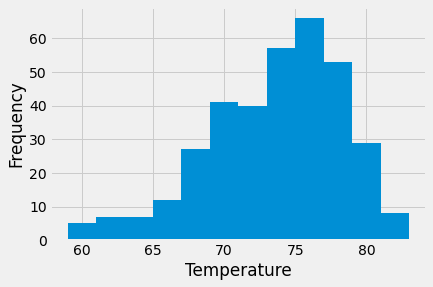

In [42]:
plt.hist(np.ravel(temperature), bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

## Close Session

In [ ]:
session.close()